<a href="https://colab.research.google.com/github/hpnightowl/Owlsbooks/blob/master/thresholding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2 
from tensorflow.keras.preprocessing import image_dataset_from_directory
import random
import datetime
import tensorflow as tf
import argparse

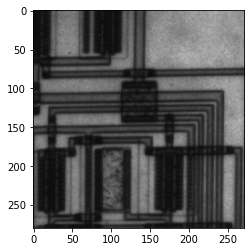

In [33]:
  pic = cv2.imread('/content/drive/MyDrive/Test_Images/Test_Images/I1.png')    
  plt.imshow(pic)

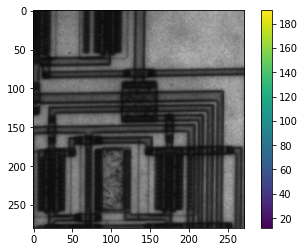

In [34]:
plt.imshow(pic)
plt.colorbar()
plt.show()

In [35]:
print("Image Properties")
print("- Number of Pixels: " + str(pic.size))
print("- Shape/Dimensions: " + str(pic.shape))

Image Properties
- Number of Pixels: 228480
- Shape/Dimensions: (280, 272, 3)


##### As you can see the shape of the pic is 280,272 also it is and RGB image as you can see the value 3.

In [36]:
import pathlib

data_dir = pathlib.Path('/content/drive/MyDrive/Test_Images/Test_Images')

In [37]:
jpg_image_count = len(list(data_dir.glob('*.jpg')))
png_image_count = len(list(data_dir.glob('*.png')))
totalfiles_image_count = len(list(data_dir.glob('*')))
print("Total PNG extention of Photoes",png_image_count)
print("Total JPG extention of Photoes",jpg_image_count)
print("Total OTHER extention of Photoes",totalfiles_image_count -( jpg_image_count+png_image_count))
print("Total Total extention of Photoes",totalfiles_image_count)

Total PNG extention of Photoes 2
Total JPG extention of Photoes 15
Total OTHER extention of Photoes 2
Total Total extention of Photoes 19


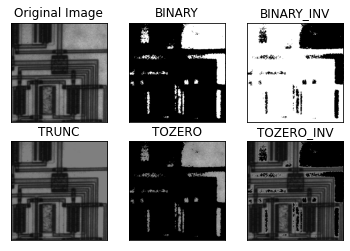

In [51]:
ret,thresh1 = cv2.threshold(pic,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(pic,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(pic,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(pic,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(pic,127,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [pic, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

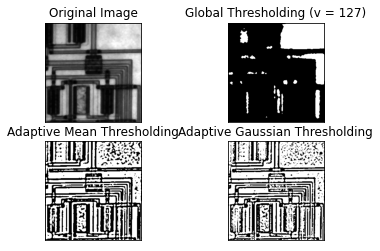

In [72]:
pic = cv2.imread('/content/drive/MyDrive/Test_Images/Test_Images/I1.png',0)
img = cv2.medianBlur(pic,5)

ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)

titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

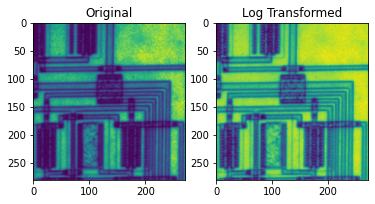

In [87]:
# log transformation method 
c = 255 / np.log(1 + np.max(pic)) 
log_image = c * (np.log(pic + 1)) 
   
# float value will be converted to int 
log_image = np.array(log_image, dtype = np.uint8) 
   
# Display both images
plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(pic) 
plt.subplot(1, 2, 2)
plt.title("Log Transformed")
plt.imshow(log_image) 
plt.show() 

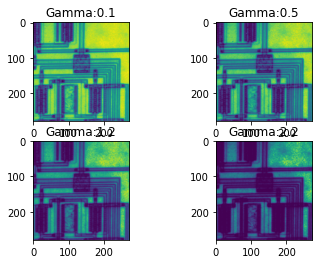

In [109]:
i=1
for gamma in [0.1, 0.5, 1.2, 2.2]: 
    # Apply gamma correction. 
    gamma_corrected = np.array(255*(pic / 255) ** gamma, dtype = 'uint8')
    plt.subplot(2, 2, i)
    plt.title("Gamma:"+str(gamma)) 
    plt.imshow(gamma_corrected)
    i=i+1

plt.show()